In [ ]:
import matplotlib.pyplot as plt #importa bibliotecas que serão utilizadas
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive #trecho de código carrega google drive
drive.mount('/content/drive')#utiliza método mount para carregar conteúdo do google drive

Mounted at /content/drive


# **COTAÇÃO DÓLAR**

In [ ]:
"""TRATANDO DADOS
arrumando datasets para manipulação"""

dolar= pd.read_csv('/content/drive/MyDrive/TDE/Cotação do Dólar por período.csv')#instancia um objeto da classe pandas.core.frame.DataFrame pelo método read_csv
# capaz de ler arquivos .csv, recebe path do dataset no drive como parâmetro


dolar = dolar.replace(',','.',regex = True).astype(float)#método replace substitui valores do dataset de maneira dinâmica, no caso transfomando valores 
#de String para float. Recebe como parêmetro os valores a serem susbstitídos, e método astype muda o tipo de uma série de dados

dolar = dolar.reset_index()#método reset_index cria uma nova coluna a partir do índice anterior com o numero de dias

dolar = dolar.rename({'index': 'Dias'},axis=1)#método rename renomeia a nova coluna criada recebendo um dicionário como parâmetro

print(dolar.info())#método info não recebe parâmetros e retorna um sumário conciso sobre o dataset instanciado 

print("\ntipo do objeto dolar: ", type(dolar))# função type retorna o tipo do objeto dolar, no caso sua classe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dias           756 non-null    int64  
 1   cotacaoCompra  756 non-null    float64
 2   cotacaoVenda   756 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 17.8 KB
None

tipo do objeto dolar:  <class 'pandas.core.frame.DataFrame'>


In [ ]:
dolar.head() #método head retorna 5 primeiras linhas do dataset

,Dias,cotacaoCompra,cotacaoVenda
0,0,3.7670,3.7676
1,1,3.7364,3.7370
2,2,3.7145,3.7151
3,3,3.6513,3.6519
4,4,3.6688,3.6694


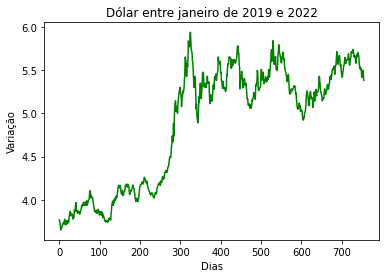

In [ ]:
a = np.array(dolar["cotacaoCompra"])#  instancia um objeto da classe numpy.ndarray, recebe como parâmetro o objeto dataframe instanciado anteriormente
#com a coluna da cotacao do dólar.

#modulo plt
plt.title('Dólar entre janeiro de 2019 e 2022')# utiliza método title para plotar título do gráfico

plt.xlabel('Dias') #metodo xlabel define nome para eixo x

plt.ylabel('Variação')# metodo ylabel define nome para eixo y

plt.plot(a,color = 'green')# método plot cria gráfico, recebendo; x = dias; y = dólar 

In [ ]:
dolar['cotacaoCompra'].describe() # método describe do pandas retorna informações estatisticas

count    756.000000
mean       4.874085
std        0.695159
min        3.651300
25%        4.100250
50%        5.196650
75%        5.444075
max        5.936600
Name: cotacaoCompra, dtype: float64

# **IPCA**

In [ ]:
ipca = pd.read_csv('/content/drive/MyDrive/TDE/IPCA_arrumado.csv',sep=';', names = ["Data", "Taxa"])#instancia um objeto da classe pandas.core.frame.DataFrame pelo método read_csv
#recebe path do dataset no drive como parâmetro, também um caractere separador de colunas e os nomes das colunas


ipca = ipca.reset_index()# método reset_index cria uma nova coluna a partir do índice anterior com o numero de meses

ipca = ipca.rename({'index': 'Meses'},axis=1)# método rename renomeia a nova coluna criada recebendo um dicionário como parâmetro, e o eixo da coluna

ipca = ipca.iloc[295:332] # método iloc de seleção de dados em lista

data_types_dict = {'Taxa': float}# cria dicionario para mudar o tipo de dado da coluna selecionada

ipca = ipca.astype(data_types_dict)# método astype do pandas altera o tipo de dado de uma séria, recebe um dicionário como parâmetro

ipca.head()#método head retorna 5 primeiras linhas da base de dados sobre índice IPCA

,Meses,Data,Taxa
295,295,janeiro 2019,0.32
296,296,fevereiro 2019,0.43
297,297,março 2019,0.75
298,298,abril 2019,0.57
299,299,maio 2019,0.13


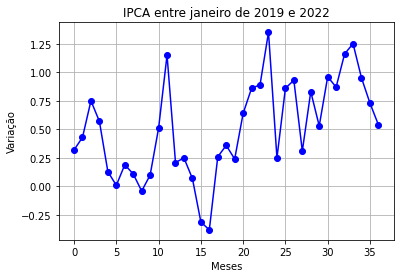

In [ ]:
taxa = np.array(ipca["Taxa"])#  instancia um objeto da classe numpy.ndarray, recebe como parâmetro o objeto dataframe instanciado anteriormente
#com a coluna do IPCA.
plt.title('IPCA entre janeiro de 2019 e 2022')# utiliza método title para plotar título do gráfico

plt.xlabel('Meses')# metodo xlabel define nome para eixo x


plt.ylabel('Variação')# metodo ylabel define nome para eixo y


plt.plot(taxa,color = 'blue',marker = 'o')# método plot cria gráfico, recebe um objeto numpy.ndarray, uma cor e um marcador como parâmetros;
# x = meses; y = IPCA

plt.grid('True') # método grid cria uma grade no plano de fundo do gráfico, default = 'False', recebe parâmetro String 'True' ou 'False'.

plt.show()# método show apresenta último gráfico criado com o módulo plt

In [ ]:
display(ipca['Taxa'].describe())# método describe do pandas retorna informações estatisticas

count    37.000000
mean      0.509189
std       0.430054
min      -0.380000
25%       0.210000
50%       0.510000
75%       0.860000
max       1.350000
Name: Taxa, dtype: float64

# **TAXA SELIC**

In [ ]:
selic = pd.read_csv('/content/drive/MyDrive/TDE/taxa_selic.csv',sep=';') # instancia um objeto da classe pandas.core.frame.DataFrame pelo método read_csv
#recebe path do dataset no drive como parâmetro, também um caractere separador de colunas


selic = selic.rename({'11 - Taxa de juros - Selic - % a.d.': 'Taxa Selic'},axis=1)# método rename renomeia a nova coluna criada recebendo um dicionário como parâmetro

selic = selic.drop([776],axis=0)# método drop retira linha ou coluna do dataframe e recebe como parâmetro uma seleção e um eixo, foi removida a última linha.

selic['Taxa Selic'] = selic['Taxa Selic'].replace(',','.',regex = True).astype(float)#método replace substitui valores do dataset de maneira dinâmica, no caso transfomando valores 
#de String para float. Recebe como parêmetro os valores a serem susbstitídos, e método astype muda o tipo da série de dados

selic = selic.reset_index()# método reset_index cria uma nova coluna a partir do índice anterior com o numero de dias

selic = selic.rename({'index': 'Dias'},axis=1)# método rename renomeia a nova coluna criada recebendo um dicionário como parâmetro

selic = selic[0:757]# seleciona os 756 dias

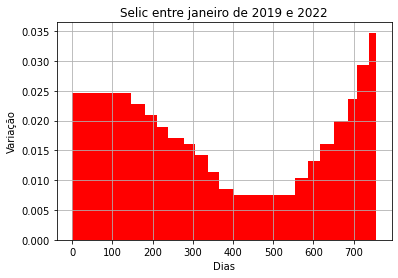

In [ ]:
# Gráfico de Barras
c=np.array(selic['Dias'])#  instancia um objeto da classe numpy.ndarray, recebe como parâmetro o objeto dataframe instanciado anteriormente
#com a coluna do IPCA. c = dias

d=np.array(selic["Taxa Selic"])#  instancia um objeto da classe numpy.ndarray, recebe como parâmetro o objeto dataframe instanciado anteriormente
#com a coluna do IPCA. d = variação selic

plt.title('Selic entre janeiro de 2019 e 2022')# utiliza método title para plotar título do gráfico

plt.xlabel('Dias')# metodo xlabel define nome para eixo x

plt.ylabel('Variação')# metodo ylabel define nome para eixo y

plt.bar(c,d,width=1,color='red')# método bar cria um gráfico de barras recebe como parâmetros os eixos x,y; a largura das barras, e a cor

plt.grid('True')# método grid cria uma grade no plano de fundo

plt.show()# método show apresenta último gráfico criado com o módulo plt


In [ ]:
display(selic['Taxa Selic'].describe())# método describe do pandas retorna informações estatisticas

count    757.000000
mean       0.017053
std        0.007390
min        0.007469
25%        0.010379
50%        0.017089
75%        0.024620
max        0.034749
Name: Taxa Selic, dtype: float64